# Repository integrity missmatch


## Detector overview



In [15]:
import json
import os
import tempfile

import numpy
import pygit2
from matplotlib import pyplot as plt
import guarddog.analyzer.metadata.pypi.repository_integrity_missmatch as repository_integrity_missmatch

with open(os.path.join(".", "resources", "all_package_info", "all_info.json"), "r") as fd:
    ALL_PACKAGE_INFO = json.load(fd)

## Find GitHub candidates



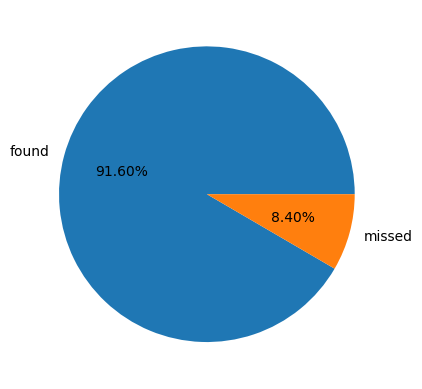

In [16]:
all_candidates = {}
build_candidates = [0, 0]
for name in list(ALL_PACKAGE_INFO.keys())[0:5000]:
    candidates = repository_integrity_missmatch.find_github_candidates(ALL_PACKAGE_INFO[name])
    if len(candidates) > 0:
        build_candidates[0] += 1
        all_candidates[name] = candidates
    else:
        build_candidates[1] += 1

y = numpy.array(build_candidates)
labels = ["found", "missed"]
plt.pie(y, labels = labels, autopct = "%1.2f%%")
plt.show()

## Find best candidate


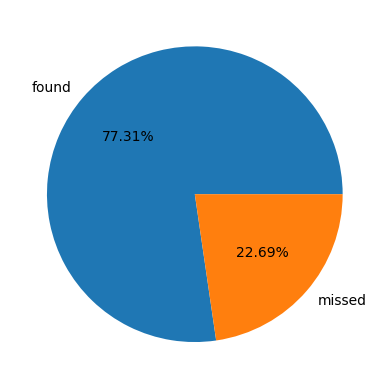

In [17]:
find_repo = [0, 0]
repo_urls = {}
for name in all_candidates.keys():
    repo = repository_integrity_missmatch.find_best_github_candidate(all_candidates[name], name)
    if repo is not None:
        find_repo[0] += 1
        repo_urls[name] = repo
    else:
        find_repo[1] += 1

y2 = numpy.array(find_repo)
plt.pie(y2, labels = labels, autopct = "%1.2f%%")
plt.show()